In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
#Pull IYT (Transportation ETF) data
ticker = "IYT" 
start= "2018-01-01" 
end= "2022-02-01"

transport = yf.download(ticker, start=start, end=end,progress=False)
transport = transport.asfreq(freq='D').ffill().dropna()
transport.to_csv('resources/transport.csv')
transport.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-27,255.710007,258.000000,249.229996,249.979996,249.979996,177200.0
2022-01-28,250.919998,253.850006,245.309998,253.660004,253.660004,210000.0
2022-01-29,250.919998,253.850006,245.309998,253.660004,253.660004,210000.0
2022-01-30,250.919998,253.850006,245.309998,253.660004,253.660004,210000.0
2022-01-31,253.389999,258.399994,252.119995,258.109985,258.109985,421100.0


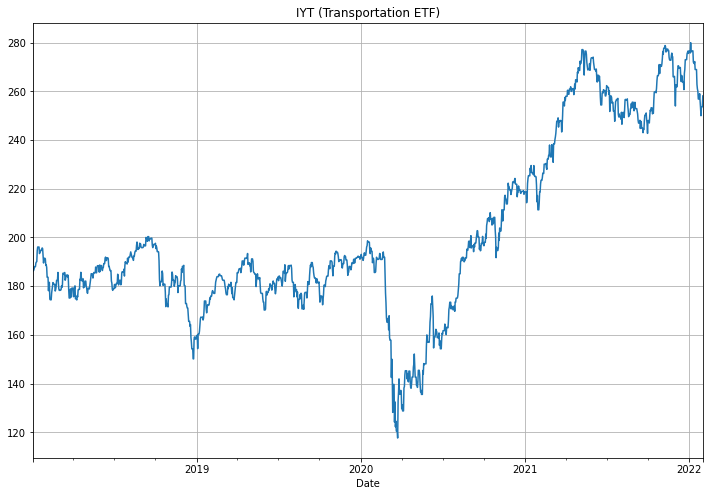

In [19]:
#Plot IYT historical prices
transport_plot = transport['Adj Close'].plot(figsize=(12,8), title='IYT (Transportation ETF)', grid=True)

In [20]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2022-02-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-27,4380.580078,4428.740234,4309.500000,4326.509766,4326.509766,4.074330e+09
2022-01-28,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,3.936030e+09
2022-01-29,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,3.936030e+09
2022-01-30,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,3.936030e+09
2022-01-31,4431.790039,4516.890137,4414.020020,4515.549805,4515.549805,4.001950e+09


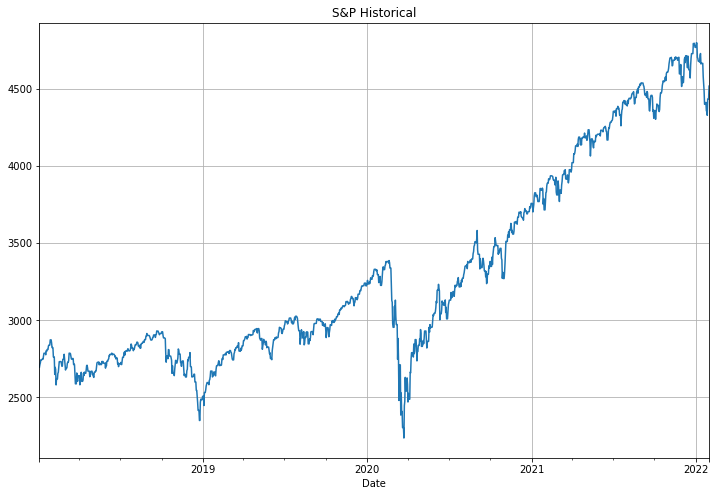

In [21]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(12,8), title='S&P Historical', grid=True)

In [22]:
#Calculate IYT percent change and 200-day rolling average
transport_percent_change = transport['Adj Close'].pct_change()
transport_percent_change_rolling = transport_percent_change.rolling(window=200).mean()

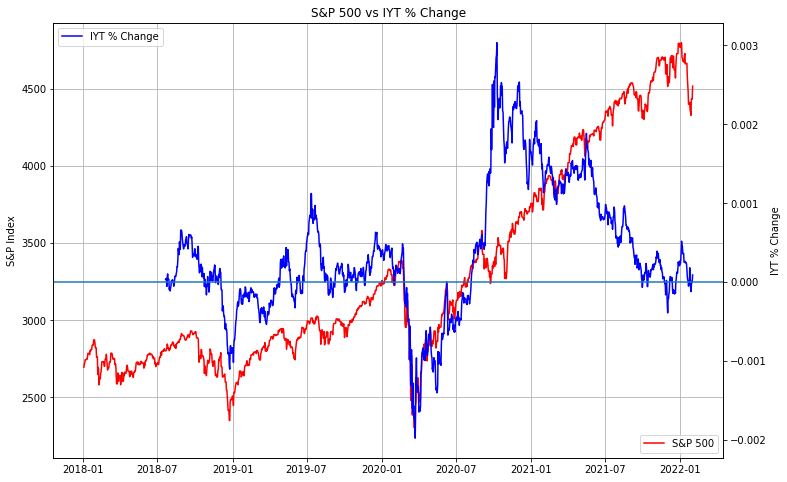

In [23]:
#Plot IYT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='lower right')

ax2 = ax.twinx()
plt.plot(transport_percent_change_rolling, label='IYT % Change', color='b')
ax.set_title('S&P 500 vs IYT % Change')
ax2.set_ylabel('IYT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper left')